In [1]:
import torch
from torch import nn 
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
N = 1000
X = np.random.random((N, 2)) * 6-3 
Y = np.cos(2*X[:,0]) + np.cos(3*X[:, 1])


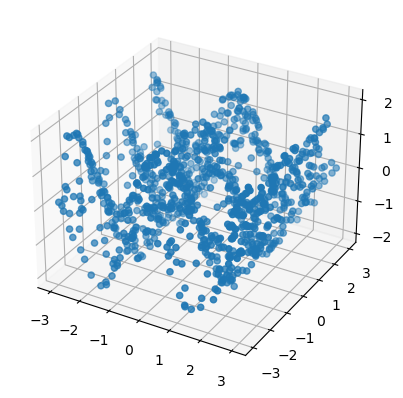

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:,1], Y)

plt.show()

In [4]:
#Build the Model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [6]:
def full_gd(model, criterion, optimizer, X_train, Y_train, epochs=2000):
    train_losses = np.zeros(epochs)
    for i in range(epochs):
        optimizer.zero_grad()

        outputs = model(X_train)

        loss = criterion(outputs, Y_train)


        loss.backward()
        optimizer.step()

        train_losses[i] = loss.item()
        if i%50 == 0:
            print(f"Epochs {i}/{epochs}: Loss {loss.item():.4f}")
    return train_losses


In [7]:
X = torch.from_numpy(X.astype(np.float32))
Y = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X, Y)

Epochs 0/2000: Loss 1.1214
Epochs 50/2000: Loss 0.6517
Epochs 100/2000: Loss 0.3798
Epochs 150/2000: Loss 0.2136
Epochs 200/2000: Loss 0.0709
Epochs 250/2000: Loss 0.0213
Epochs 300/2000: Loss 0.0090
Epochs 350/2000: Loss 0.0056
Epochs 400/2000: Loss 0.0045
Epochs 450/2000: Loss 0.0055
Epochs 500/2000: Loss 0.0037
Epochs 550/2000: Loss 0.0126
Epochs 600/2000: Loss 0.0033
Epochs 650/2000: Loss 0.0031
Epochs 700/2000: Loss 0.0034
Epochs 750/2000: Loss 0.0030
Epochs 800/2000: Loss 0.0029
Epochs 850/2000: Loss 0.0044
Epochs 900/2000: Loss 0.0028
Epochs 950/2000: Loss 0.0026
Epochs 1000/2000: Loss 0.0069
Epochs 1050/2000: Loss 0.0026
Epochs 1100/2000: Loss 0.0025
Epochs 1150/2000: Loss 0.0038
Epochs 1200/2000: Loss 0.0025
Epochs 1250/2000: Loss 0.0041
Epochs 1300/2000: Loss 0.0024
Epochs 1350/2000: Loss 0.0084
Epochs 1400/2000: Loss 0.0024
Epochs 1450/2000: Loss 0.0023
Epochs 1500/2000: Loss 0.0067
Epochs 1550/2000: Loss 0.0023
Epochs 1600/2000: Loss 0.0023
Epochs 1650/2000: Loss 0.0027
Epo

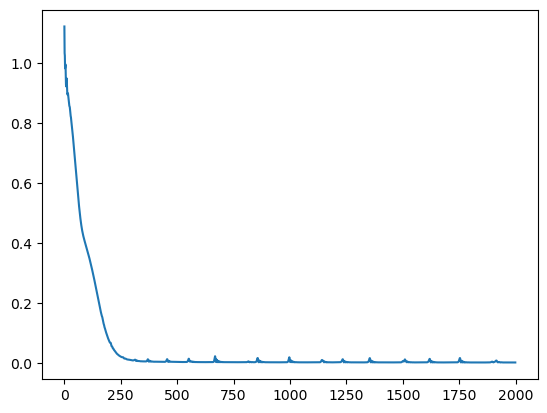

In [8]:
plt.plot(train_losses)

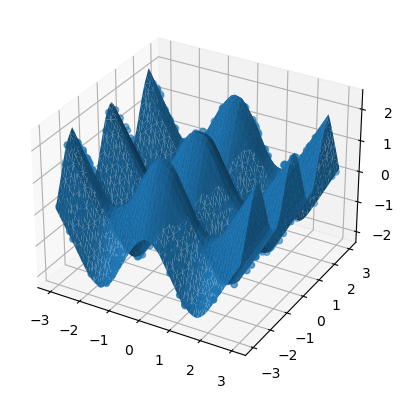

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

with torch.no_grad():
    line = np.linspace(-3, 3 ,50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:,0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
    plt.show()

In [11]:
torch.save(model.state_dict(), "3Dmodel.pt")

In [12]:
ls 

 Volume in drive D is Software
 Volume Serial Number is 4CC5-A0D8

 Directory of d:\PYTORCH for AI & ML\Artificial Neural Network in Pytorch

03/11/2022  22:54    <DIR>          .
03/11/2022  22:54    <DIR>          ..
03/11/2022  19:51               336 3D_plotting.py
03/11/2022  22:56               831 3D_plotting2.py
03/11/2022  22:54             3,487 3Dmodel.pt
03/11/2022  03:30    <DIR>          MNIST
03/11/2022  20:18           408,543 MNIST model.pt
03/11/2022  20:14               305 model_testing.py
03/11/2022  20:18            90,569 output.png
03/11/2022  20:40           339,562 Pytorch Neural Network.ipynb
03/11/2022  22:54           313,493 Pytorch Regression.ipynb
               8 File(s)      1,157,126 bytes
               3 Dir(s)  56,885,104,640 bytes free
